# Topic Modelling
Topic modeling is an unsupervised machine learning technique used to automatically identify and group hidden themes or topics within a collection of documents. It helps organize, summarize, and understand large text datasets by clustering similar words and documents together based on their content.

# Application

* Dimensionaly Reduction
* Recommendation System
* Clustering
* Classification

# Topic Modeling Algorithms
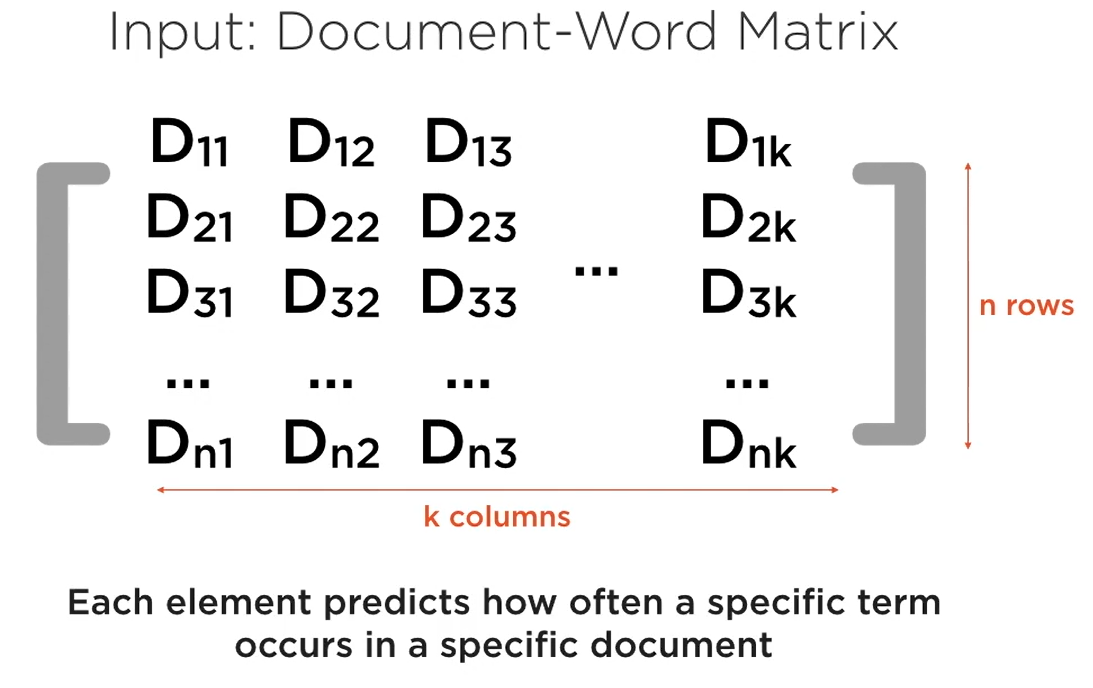

## Latent Semantic Analysis (LSA)

To uncover hidden semantic relationships between words and documents. It assumes that words with similar meanings appear in similar contexts.

<pre>
Text  →  Term-Doc Matrix  →  SVD  →  Topic Space  →  Applications
</pre>

🔹 **Step 1: Raw Text Data**

Imagine we have 3 documents:

<pre>
Doc1: "Cats like milk"
Doc2: "Dogs like bones"
Doc3: "Cats and dogs like pets"
</pre>
<hr>

🔹 **Step 2: Term-Document Matrix (TDM)**

We convert text into a matrix, where:
Rows = terms (words)
Columns = documents
Values = term frequency (TF) or TF-IDF

|Term    | Doc1 | Doc2 | Doc3 |
|--------|------|------|------|
|cats    |  1   |  0   |  1   |
|dogs    |  0   |  1   |  1   |
|like    |  1   |  1   |  1   |
|milk    |  1   |  0   |  0   |
|bones   |  0   |  1   |  0   |
|pets    |  0   |  0   |  1   |

We call this matrix A.
<hr>

🔹 **Step 3: Apply Singular Value Decomposition (SVD)**

We decompose matrix A into three matrices:

<pre>
A = U × Σ × Vᵀ    
</pre>

Here's what they represent:

* U = term-topic matrix (words → topics)
* Σ = singular values (importance of topics)
* Vᵀ = document-topic matrix (docs → topics)

📌 Visual Representation of SVD
<pre>
        A                  U                   Σ                   Vᵀ
(terms x docs)   =  (terms x topics) × (topics x topics) × (topics x docs)
</pre>

 * U (terms x topics) → Words in topic space
 * Σ (topics x topics) → Strength of each topic
 * Vᵀ (topics x docs) → Docs in topic space

📌 Matrix U (Term → Topic)

<pre>
          Topic1   Topic2
cats       0.58     0.10
dogs       0.58    -0.10
like       0.58     0.00
milk       0.28     0.90
bones      0.28    -0.90
pets       0.41     0.00
</pre>

Interpretation:
1. Each row represents a word.
2. Each column is a latent topic (not labeled by us — learned by the model).

📌 Matrix Σ (Singular Values)
<pre>
Σ = diag([2.7, 1.4])
</pre>

Interpretation:
1. These are weights of topics.
2. Higher values = more important latent topics.
3. We often keep top-k topics (dimensionality reduction).

📌 Matrix Vᵀ (Topic → Document)
<pre>
         Doc1   Doc2   Doc3
Topic1   0.60   0.60   0.60
Topic2   0.70  -0.70   0.00
</pre>

Interpretation:
1. Shows how each document maps to the topics.

<hr>

🔹 **Step 4: Dimensionality Reduction**
We reduce to k topics (say k = 2). This means we only keep the top 2 singular values and their corresponding vectors.

This reveals latent structure, e.g.:

* Topic 1: animals (cats, dogs, pets)
* Topic 2: preferences (like, milk, bones)

<hr>

🔹 **Step 5: Semantic Similarity**
Now we can:

Measure similarity between documents in topic space.

Find synonyms (e.g., "cats" and "dogs" appear in similar contexts).

Perform information retrieval or clustering.

LSA groups terms based on co-occurrence patterns — even if words don't directly appear together.

<h5>Example</h5>
“milk” and “bones” never appear together, <br> but both co-occur with “like” → captured as semantically related.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np

# Sample corpus
docs = [
    "Apple and orange are fruits",
    "Tiger and lion are animals",
    "I like apple and lion",
    "Fruits are healthy and tasty",
    "Animals like forest and wild",
    "Orange is a fruit, tiger is an animal"
]

# Step 1: Convert text to TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs)

# Step 2: Apply LSA (TruncatedSVD)
lsa_model = TruncatedSVD(n_components=2, random_state=42)
X_lsa = lsa_model.fit_transform(X)

# Step 3: Print results
print("\n🔤 Terms in Vocabulary:")
print(vectorizer.get_feature_names_out())

print("\n📄 Document coordinates in 2D topic space:")
print(pd.DataFrame(X_lsa, columns=["Topic 1", "Topic 2"]))

print("\n📚 Top terms in each topic:")
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa_model.components_):
    terms_in_topic = zip(terms, comp)
    sorted_terms = sorted(terms_in_topic, key=lambda x: -abs(x[1]))[:5]
    print(f"Topic {i+1}: ", [t[0] for t in sorted_terms])



🔤 Terms in Vocabulary:
['animal' 'animals' 'apple' 'forest' 'fruit' 'fruits' 'healthy' 'like'
 'lion' 'orange' 'tasty' 'tiger' 'wild']

📄 Document coordinates in 2D topic space:
    Topic 1   Topic 2
0  0.567410  0.649161
1  0.649675 -0.403636
2  0.722812 -0.147981
3  0.223722  0.638020
4  0.483710 -0.484601
5  0.428941  0.215696

📚 Top terms in each topic:
Topic 1:  ['lion', 'apple', 'like', 'animals', 'tiger']
Topic 2:  ['fruits', 'orange', 'animals', 'healthy', 'tasty']


## Latent Dirichlet Allocation (LDA)

LDA is a generative probabilistic model used for topic modeling.
It assumes:

📌 Each document is a mixture of topics, and each topic is a distribution over words.

🔹 **Step 1: The Ingredients**
Let’s say we have 3 documents:
<pre>
Doc1: "Apple and orange are fruits"
Doc2: "Tiger and lion are animals"
Doc3: "I like apple and lion"
</pre>

LDA tries to answer:

🧠 What hidden topics explain the words across these documents?
<hr>

🔹 **Step 2: LDA Assumptions**

LDA assumes:
<pre>
- Each document = a mixture of K topics (e.g. 2 topics: Food, Animals)
- Each topic = a probability distribution over words
</pre>
Let’s say LDA finds:
<pre>
Topic A (Fruits):    {apple: 0.4, orange: 0.3, fruits: 0.3}
Topic B (Animals):   {tiger: 0.4, lion: 0.4, animals: 0.2}
</pre>

And documents:

| Document | Topic A (Fruit) | Topic B (Animal) |
| -------- | --------------- | ---------------- |
| Doc1     | 0.9             | 0.1              |
| Doc2     | 0.1             | 0.9              |
| Doc3     | 0.5             | 0.5              |
<hr>

🔹 **Step 3: Diagram — How LDA Generates Documents**
Let’s visualize the generative process LDA assumes:

🧠 LDA Generative Model Diagram
<pre>
[For each document d]
     |
     |-- Choose topic distribution θ_d ~ Dir(α)
     |
     |-- For each word w_n in document:
            |
            |-- Choose a topic z_n ~ Multinomial(θ_d)
            |
            |-- Choose a word w_n ~ Multinomial(φ_{z_n})
</pre>
Now let's annotate this with a clearer flowchart:
<pre>
      Document d
         ↓
  Dirichlet distribution (α)
         ↓
  Topic distribution θ_d (e.g. 70% Topic A, 30% Topic B)
         ↓
   ┌─────────────┬─────────────┬─────────────┐
   ↓             ↓             ↓             ↓
Choose topic → Choose word   → Choose topic → Choose word
 z₁ ~ θ_d        w₁ ~ φ_z₁     z₂ ~ θ_d        w₂ ~ φ_z₂
</pre>

Each word is picked by:
1. Rolling a topic dice → pick a topic
2. Rolling a word dice from that topic → pick a word



**📦 What LDA Learns**

LDA doesn’t know the topics upfront. It discovers:

🔢 θ_d → Topic proportions for each document<br>
🔠 φ_k → Word distributions for each topic

It uses Bayesian inference (Gibbs Sampling or Variational Inference) to estimate these.

📌 Visual: Topic–Word Distribution

Let’s look at Topics as Distributions over Words (φ)
<pre>
Topic A: Fruits
| apple   ████████ 0.4
| orange  ██████   0.3
| fruit   █████    0.3

Topic B: Animals
| tiger   ████████ 0.4
| lion    ████████ 0.4
| animals ███      0.2
</pre>

📌 Visual: Document–Topic Distribution (θ)
<pre>
Doc1:
| Topic A (Fruits)  ██████████ 0.9
| Topic B (Animals) █          0.1

Doc2:
| Topic A           █          0.1
| Topic B           ██████████ 0.9

Doc3:
| Topic A           █████      0.5
| Topic B           █████      0.5
</pre>
<hr>

**🤖 Programmer's View of LDA**

**🔢 Inputs:**
1. A list of tokenized documents (word bags)
2. Number of topics K

**🧠 Output:**
1. topic_word_distribution: matrix of shape (K × V)
2. document_topic_distribution: matrix of shape (D × K)

In [2]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("../input/abcnewsdata/news-data.csv")
print(df.columns, df.shape)
df = df.head(10000)

X = df['headline_text']

vectorizer = CountVectorizer(ngram_range=(2, 2))
X_transformed = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()
print("features:", feature_names)

Index(['publish_date', 'headline_text'], dtype='object') (1103663, 2)
features: ['10 arrested' '10 awarded' '10 day' ... 'zone to' 'zone with' 'zoos to']


In [3]:
n_topics = 20
model_lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20)
X_lda = model_lda.fit_transform(X_transformed)
print(X_lda.shape)    # Document Topic probability
X_lda

(10000, 20)


array([[0.00833333, 0.00833333, 0.84166667, ..., 0.00833333, 0.00833333,
        0.00833333],
       [0.00625   , 0.00625   , 0.00625   , ..., 0.00625   , 0.00625   ,
        0.00625   ],
       [0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       ...,
       [0.0125    , 0.0125    , 0.0125    , ..., 0.0125    , 0.0125    ,
        0.0125    ],
       [0.00625   , 0.00625   , 0.00625   , ..., 0.00625   , 0.00625   ,
        0.00625   ],
       [0.00625   , 0.00625   , 0.00625   , ..., 0.00625   , 0.00625   ,
        0.00625   ]])

In [4]:
model_lda.components_.shape  # Topic word matrix

(20, 40161)

In [5]:
top_words = 10
for topic_id, topic_words_probs in enumerate(model_lda.components_):
    top_feature_names = [feature_names[i] for i in topic_words_probs.argsort()[: -top_words -1 : -1]]
    print(f"=========== Topic {topic_id} ==============")
    print(f"Top words: {top_feature_names}")

=========== Topic 0 ==============
Top words: ['in hospital', 'hospital after', 'anti war', 'war protest', 'to be', 'man in', 'killed in', 'urged to', 'north coast', 'plan for']
=========== Topic 1 ==============
Top words: ['on the', 'the rise', 'call for', 'injured in', 'for iraq', 'iraq war', 'wa govt', 'police continue', 'continue probe', 'to be']
=========== Topic 2 ==============
Top words: ['anti war', 'war protesters', 'war protests', 'war rally', 'war protest', 'calls for', 'out of', 'protests in', 'to be', 'critical of']
=========== Topic 3 ==============
Top words: ['urged to', 'go ahead', 'to be', 'us troops', 'in baghdad', 'iraq says', 'to go', 'out of', 'human rights', 'to iraq']
=========== Topic 4 ==============
Top words: ['to face', 'court over', 'charged over', 'man charged', 'face court', 'man to', 'court on', 'faces court', 'charged with', 'council to']
=========== Topic 5 ==============
Top words: ['to be', 'urged to', 'to get', 'world cup', 'call for', 'al qaeda'

In [6]:
topics = []
for i in range(X_lda.shape[0]):
    topics.append(X_lda[i].argmax())
df['topic'] = topics
df

,publish_date,headline_text,topic
0,20030219,aba decides against community broadcasting lic...,2
1,20030219,act fire witnesses must be aware of defamation,8
2,20030219,a g calls for infrastructure protection summit,14
3,20030219,air nz staff in aust strike for pay rise,14
4,20030219,air nz strike to affect australian travellers,4
...,...,...,...
9995,20030407,us units attack palace as fighting rages in heart,19
9996,20030407,vasco win 10 goal thriller in brazil on edmundos,14
9997,20030407,vic bushfires inquiry begins,3
9998,20030407,vic govt plan aims to reduce water use,14


#### Visualize - Matplotlib

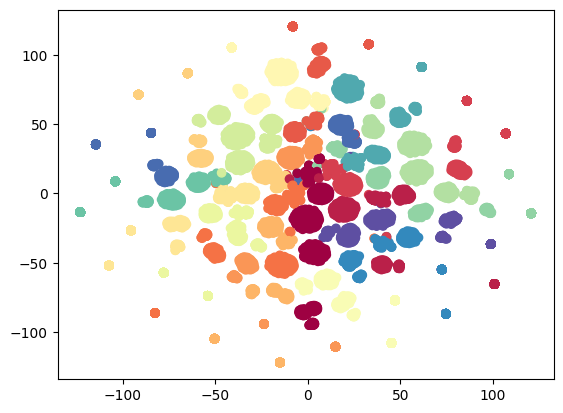

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model_tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = model_tsne.fit_transform(X_lda)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['topic'], cmap=plt.cm.Spectral)

#### Visualize - pyLDAvis

In [8]:
!pip install pyLDAvis --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 37.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [9]:
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

panel = pyLDAvis.lda_model.prepare(model_lda, X_transformed, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster      Freq
topic                                                 
2      13.844729  23.727308       1        1  5.413421
7      31.927540  -5.464868       2        1  5.326014
4     -37.508175  -8.419330       3        1  5.256370
3     -26.464809 -21.548342       4        1  5.198890
15    -14.663481  28.636902       5        1  5.147259
5      25.021420  11.834457       6        1  5.143450
6      15.869093  -4.218594       7        1  5.096859
14      1.169320  34.458920       8        1  5.046503
13     -5.495271   0.207164       9        1  5.031479
9       3.846344 -12.276260      10        1  5.021360
0     -12.624924 -32.466614      11        1  5.017258
8       7.705025   7.572401      12        1  5.002277
11    -30.495407  24.254320      13        1  4.980016
16    -10.334794 -15.582331      14        1  4.961394
10      4.350987 -29.065582      15        1  4.913351
17    -17.289820  11.010009      16        1  4.909250
18     -3.202125  16.897612      17        1  4.760510
12    -20.642138  -4.193502      18        1  4.646285
19     19.948965 -21.358427      19        1  4.610560
1     -33.914955   7.821189      20        1  4.517492, topic_info=               Term       Freq      Total Category  logprob  loglift
2006       anti war  48.000000  48.000000  Default  30.0000  30.0000
35371       to face  27.000000  27.000000  Default  29.0000  29.0000
8444     court over  20.000000  20.000000  Default  28.0000  28.0000
21129   man charged  18.000000  18.000000  Default  27.0000  27.0000
6540   charged over  19.000000  19.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
15210       govt to   1.689135  15.490411  Topic20  -7.2760   0.8812
35451       to help   1.689135  19.479679  Topic20  -7.2760   0.6521
6540   charged over   1.689135  19.718392  Topic20  -7.2760   0.6399
23646      nsw govt   1.135320  12.000481  Topic20  -7.6733   0.7392
22580       move to   1.135320   5.704126  Topic20  -7.6733   1.4829

[1258 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
17        17  0.878908      100 car
87         7  0.869044       14 die
142       14  0.873164  1970 report
154       10  0.580780     20 years
159       14  0.873164  200 workers
...      ...       ...          ...
40062     15  0.108935       yet to
40062     17  0.108935       yet to
40062     20  0.108935       yet to
40104     15  0.583500   youth week
40114      4  0.576398    zap glory

[3111 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 8, 5, 4, 16, 6, 7, 15, 14, 10, 1, 9, 12, 17, 11, 18, 19, 13, 20, 2])

## Non-Negative Matrix Factorization (NMF)

NMF is a linear algebra technique that factorizes a non-negative matrix into two smaller non-negative matrices, capturing latent features (topics) in your data.

Let’s say we have documents with non-negative word counts (or TF-IDF scores). NMF tries to express each document as a combination of a few topics, where each topic is a combination of words.

🔹 **Step 1: Start with a Term-Document Matrix A**

Imagine we have 3 simple documents:

<pre>
Doc1: "apple banana fruit"
Doc2: "tiger lion animal"
Doc3: "apple lion wild"
</pre>

Convert this into a Term-Document Matrix using word counts or TF-IDF.

📌 Matrix A (6 terms × 3 docs):

| Term   | Doc1 | Doc2 | Doc3 |
| ------ | ---- | ---- | ---- |
| apple  | 1    | 0    | 1    |
| banana | 1    | 0    | 0    |
| fruit  | 1    | 0    | 0    |
| tiger  | 0    | 1    | 0    |
| lion   | 0    | 1    | 1    |
| wild   | 0    | 0    | 1    |

This is our matrix A (terms × documents)
<hr>

🔹 **Step 2: Apply NMF**

NMF factorizes A as:

        A (terms × docs) ≈ W (terms × topics) × H (topics × docs)

Where:<br>
W = Term × Topics matrix (each row = word’s contribution to topics)<br>
H = Topics × Document matrix (each column = doc’s mix of topics)

📌 W: Topic → Words
| Term   | Topic1 (Fruit) | Topic2 (Animal) |
| ------ | -------------- | --------------- |
| apple  | 0.9            | 0.1             |
| banana | 0.8            | 0.0             |
| fruit  | 0.9            | 0.0             |
| tiger  | 0.0            | 0.9             |
| lion   | 0.1            | 0.8             |
| wild   | 0.0            | 0.6             |

📌 H: Documents → Topics
|        | Doc1 | Doc2 | Doc3 |
| ------ | ---- | ---- | ---- |
| Topic1 | 0.85 | 0.05 | 0.40 |
| Topic2 | 0.15 | 0.95 | 0.60 |

* Doc1 is mostly Topic1 (Fruit)
* Doc2 is mostly Topic2 (Animals)
* Doc3 is mixed

In [10]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("../input/abcnewsdata/news-data.csv")
print(df.columns, df.shape)

df = df.head(10000)
X = df['headline_text']
vectorizer = CountVectorizer(stop_words='english')
X_transformed = vectorizer.fit_transform(X)

feature_names = vectorizer.get_feature_names_out()
print("features:", feature_names)

Index(['publish_date', 'headline_text'], dtype='object') (1103663, 2)
features: ['10' '100' '1000' ... 'zoo' 'zoos' 'zurich']


In [11]:
num_topics = 20
model_nmf = NMF(n_components=num_topics)
X_nmf = model_nmf.fit_transform(X_transformed)
X_nmf.shape

(10000, 20)

In [12]:
model_nmf.components_.shape

(20, 9837)

In [13]:
top_words = 10
for topic_id, topic_words_probs in enumerate(model_nmf.components_):
    top_feature_names = [feature_names[i] for i in topic_words_probs.argsort()[: -top_words -1 : -1]]
    print(f"=========== Topic {topic_id} ==============")
    print(f"Top words: {top_feature_names}")

=========== Topic 0 ==============
Top words: ['iraq', 'troops', 'missiles', 'howard', 'blair', 'denies', 'bush', 'british', 'post', 'pm']
=========== Topic 1 ==============
Top words: ['war', 'howard', 'protest', 'post', 'pm', 'fears', 'protests', 'bush', 'downer', 'warns']
=========== Topic 2 ==============
Top words: ['police', 'probe', 'wa', 'search', 'investigate', 'murder', 'drug', 'missing', 'cannabis', 'arrest']
=========== Topic 3 ==============
Top words: ['govt', 'vic', 'sa', 'urged', 'wa', 'nt', 'rejects', 'local', 'tas', 'claims']
=========== Topic 4 ==============
Top words: ['man', 'charged', 'murder', 'missing', 'stabbing', 'jailed', 'charge', 'search', 'assault', 'accident']
=========== Topic 5 ==============
Top words: ['new', 'resolution', 'zealand', 'work', 'high', 'hopes', 'president', 'ceo', 'wa', 'support']
=========== Topic 6 ==============
Top words: ['says', 'korea', 'minister', 'crean', 'downer', 'group', 'pm', 'mp', 'missing', 'nt']
=========== Topic 7 =====

In [14]:
topics = []
for i in range(X_nmf.shape[0]):
    topics.append(X_nmf[i].argmax())
df['topic'] = topics
df

,publish_date,headline_text,topic
0,20030219,aba decides against community broadcasting lic...,9
1,20030219,act fire witnesses must be aware of defamation,10
2,20030219,a g calls for infrastructure protection summit,18
3,20030219,air nz staff in aust strike for pay rise,18
4,20030219,air nz strike to affect australian travellers,11
...,...,...,...
9995,20030407,us units attack palace as fighting rages in heart,17
9996,20030407,vasco win 10 goal thriller in brazil on edmundos,16
9997,20030407,vic bushfires inquiry begins,3
9998,20030407,vic govt plan aims to reduce water use,14
